In [1]:
import matplotlib.pyplot as plt 
import pandas as ps 
import os 
import IPython.display as ipd 
import pandas as pd
import librosa
#import librosa.display
%matplotlib inline

In [2]:
filename = r"C:\Users\Ruchita Gayatri\Downloads\AB\STE-115_person A.wav"
metadata = pd.read_csv(r"C:\Users\Ruchita Gayatri\Downloads\audio_data.csv")
metadata.head()

,relative_path,classID,Numeric ID
0,C:\Users\Ruchita Gayatri\Downloads\AB\STE-054_...,1,54
1,C:\Users\Ruchita Gayatri\Downloads\AB\STE-055_...,1,55
2,C:\Users\Ruchita Gayatri\Downloads\AB\STE-056_...,1,56
3,C:\Users\Ruchita Gayatri\Downloads\AB\STE-057_...,1,57
4,C:\Users\Ruchita Gayatri\Downloads\AB\STE-058_...,1,58


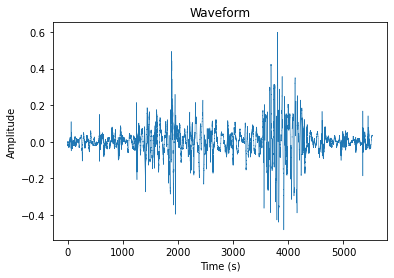

In [124]:
import librosa
import matplotlib.pyplot as plt

# Load audio file
librosa_audio_data, librosa_sample_rate = librosa.load(r"C:\Users\Ruchita Gayatri\Downloads\AB\STE-113_person A.wav")

# Generate the time axis
duration = len(librosa_audio_data) / librosa_sample_rate
time = librosa.times_like(librosa_audio_data, sr=librosa_sample_rate)

# Create the waveform plot
plt.figure()
plt.plot(time, librosa_audio_data, linewidth=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')

# Show the plot
plt.show()


In [5]:
def features_extractor(file):
    audio,sample_rate = librosa.load(file_name)
    mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=100)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [16]:
data.shape

(100,)

In [6]:
#Feature Extraction

import pandas as pd
import numpy as np 
extracted_features = []
for i in range(51):
    file_name = metadata.loc[i, 'relative_path']
    #file_name = f'r"{file_name1}"'
    final_class_labels = metadata.loc[i, 'classID']
    data = features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

extracted_features_df = pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-364.301, 69.396645, 17.120214, 15.068575, 8....",1
1,"[-429.45187, 68.53903, 11.999503, 20.091782, 6...",1
2,"[-383.5, 47.17122, 22.387608, 19.533028, 10.05...",1
3,"[-368.046, 82.30127, 6.60783, 15.252235, 2.379...",1
4,"[-370.9838, 71.60263, 16.738106, 16.171688, 5....",1


In [9]:
#Split the dataset into independent and dependent dataset
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [11]:
X.shape

(51, 100)

In [162]:
#from sklearn.preprocessing import StandardScaler,MinMaxScaler 

#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [133]:
# Train test split for ML model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [134]:
# Machine Learning Model 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier()
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(model.__class__.__name__, "accuracy:", accuracy)



C:\Users\Ruchita Gayatri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression accuracy: 1.0
DecisionTreeClassifier accuracy: 0.8571428571428571
RandomForestClassifier accuracy: 1.0
SVC accuracy: 0.47619047619047616
KNeighborsClassifier accuracy: 1.0


In [109]:
### DL-Model

import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam 
from sklearn import metrics 

In [110]:
num_labels = 2  # Class labels (Person-A,Person-B)

In [126]:
model = Sequential()
## 1st layer 
model.add(Dense(200,input_shape=(100,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## 2nd layer 
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## 3rd layer 
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

## final layer 
model.add(Dense(num_labels))
model.add(Activation('sigmoid'))


In [127]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 200)               20200     
                                                                 
 activation_60 (Activation)  (None, 200)               0         
                                                                 
 dropout_45 (Dropout)        (None, 200)               0         
                                                                 
 dense_61 (Dense)            (None, 200)               40200     
                                                                 
 activation_61 (Activation)  (None, 200)               0         
                                                                 
 dropout_46 (Dropout)        (None, 200)               0         
                                                                 
 dense_62 (Dense)            (None, 100)             

In [128]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [129]:
# Train Test split for DL

y1 = np.array(pd.get_dummies(y)) # Categorical variables to One hot encoder for DL
X_train,X_test,y_train,y_test = train_test_split(X,y1,test_size=0.4,random_state=42)

In [130]:
## Training Model

from tensorflow.keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 100 
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='Downloads/audio_classification.hdf5',verbose=1,save_best_only=True)

model.fit(X_train,y_train,batch_size=num_batch_size,epochs= num_epochs,validation_data=(X_test,y_test),callbacks=[checkpointer])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 22.1334 - accuracy: 0.5000
Epoch 1: val_loss improved from inf to 2.78983, saving model to Downloads\audio_classification.hdf5
1/1 [==============================] - 2s 2s/step - loss: 22.1334 - accuracy: 0.5000 - val_loss: 2.7898 - val_accuracy: 0.4762
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 21.9694 - accuracy: 0.6000
Epoch 2: val_loss did not improve from 2.78983
1/1 [==============================] - 0s 94ms/step - loss: 21.9694 - accuracy: 0.6000 - val_loss: 9.1604 - val_accuracy: 0.4762
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 19.0735 - accuracy: 0.6000
Epoch 3: val_loss did not improve from 2.78983
1/1 [==============================] - 0s 83ms/step - loss: 19.0735 - accuracy: 0.6000 - val_loss: 12.8063 - val_accuracy: 0.4762
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 28.2709 - accuracy: 0.5000
Epoch 4: val_loss did not improve from 2.789

Epoch 31/100
1/1 [==============================] - ETA: 0s - loss: 9.5094 - accuracy: 0.6333
Epoch 31: val_loss did not improve from 0.53456
1/1 [==============================] - 0s 82ms/step - loss: 9.5094 - accuracy: 0.6333 - val_loss: 1.3868 - val_accuracy: 0.5238
Epoch 32/100
1/1 [==============================] - ETA: 0s - loss: 10.2994 - accuracy: 0.3333
Epoch 32: val_loss did not improve from 0.53456
1/1 [==============================] - 0s 76ms/step - loss: 10.2994 - accuracy: 0.3333 - val_loss: 1.1492 - val_accuracy: 0.5238
Epoch 33/100
1/1 [==============================] - ETA: 0s - loss: 6.5141 - accuracy: 0.5333
Epoch 33: val_loss did not improve from 0.53456
1/1 [==============================] - 0s 76ms/step - loss: 6.5141 - accuracy: 0.5333 - val_loss: 0.7470 - val_accuracy: 0.5238
Epoch 34/100
1/1 [==============================] - ETA: 0s - loss: 10.0851 - accuracy: 0.5000
Epoch 34: val_loss improved from 0.53456 to 0.52482, saving model to Downloads\audio_classifi

Epoch 61/100
1/1 [==============================] - ETA: 0s - loss: 6.9547 - accuracy: 0.5333
Epoch 61: val_loss did not improve from 0.45834
1/1 [==============================] - 0s 83ms/step - loss: 6.9547 - accuracy: 0.5333 - val_loss: 0.8568 - val_accuracy: 0.5238
Epoch 62/100
1/1 [==============================] - ETA: 0s - loss: 3.8896 - accuracy: 0.5333
Epoch 62: val_loss did not improve from 0.45834
1/1 [==============================] - 0s 101ms/step - loss: 3.8896 - accuracy: 0.5333 - val_loss: 0.8537 - val_accuracy: 0.5238
Epoch 63/100
1/1 [==============================] - ETA: 0s - loss: 3.4151 - accuracy: 0.5000
Epoch 63: val_loss did not improve from 0.45834
1/1 [==============================] - 0s 86ms/step - loss: 3.4151 - accuracy: 0.5000 - val_loss: 0.8367 - val_accuracy: 0.5238
Epoch 64/100
1/1 [==============================] - ETA: 0s - loss: 4.8358 - accuracy: 0.4667
Epoch 64: val_loss did not improve from 0.45834
1/1 [==============================] - 0s 98ms/

1/1 [==============================] - ETA: 0s - loss: 3.3910 - accuracy: 0.4333
Epoch 91: val_loss did not improve from 0.45834
1/1 [==============================] - 0s 82ms/step - loss: 3.3910 - accuracy: 0.4333 - val_loss: 0.5542 - val_accuracy: 0.5714
Epoch 92/100
1/1 [==============================] - ETA: 0s - loss: 2.7709 - accuracy: 0.5667
Epoch 92: val_loss did not improve from 0.45834
1/1 [==============================] - 0s 80ms/step - loss: 2.7709 - accuracy: 0.5667 - val_loss: 0.5523 - val_accuracy: 0.5714
Epoch 93/100
1/1 [==============================] - ETA: 0s - loss: 2.0551 - accuracy: 0.5667
Epoch 93: val_loss did not improve from 0.45834
1/1 [==============================] - 0s 84ms/step - loss: 2.0551 - accuracy: 0.5667 - val_loss: 0.5469 - val_accuracy: 0.6667
Epoch 94/100
1/1 [==============================] - ETA: 0s - loss: 2.5261 - accuracy: 0.6333
Epoch 94: val_loss did not improve from 0.45834
1/1 [==============================] - 0s 92ms/step - loss: 2

In [131]:
test_accuracy = model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9047619104385376


In [132]:
# Predictions

file_name = r"C:\Users\Ruchita Gayatri\Downloads\AB\STE-063_person B.wav"
prediction_feature = features_extractor(filename)
prediction_feature = prediction_feature.reshape(1, -1)
predicted_probabilities = model.predict(prediction_feature)
predicted_class = np.argmax(predicted_probabilities)

if predicted_class == 1 :
    print("Predicted class: Person A")
else :
     print("Predicted class: Person B")
    
#print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 172ms/step
Predicted class: Person B


In [181]:
### GAN - For artificial data generation 
dataset = extracted_features_df.values

# Separate features and labels
features = dataset[0]
labels = dataset[1]

# Define the GAN architecture
latent_dim = 100  # Size of the random noise vector

# Generator model
generator = Sequential()
generator.add(Dense(128, input_dim=latent_dim, activation='relu'))
generator.add(Dense(features.shape[0], activation='linear'))  # Output shape matches feature size

# Discriminator model
discriminator = Sequential()
discriminator.add(Dense(128, input_dim=features.shape[0], activation='relu'))
discriminator.add(Dense(1, activation='sigmoid'))

# Combined GAN model
discriminator.trainable = False  # Freeze discriminator during generator training
gan = Sequential([generator, discriminator])

# Compile models
generator.compile(optimizer=Adam(), loss='binary_crossentropy')
discriminator.compile(optimizer=Adam(), loss='binary_crossentropy')
gan.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the GAN
epochs = 1000
batch_size = 16

for epoch in range(epochs):
    # Select a random batch of real samples
    idx = np.random.randint(0, features.shape[1], batch_size)
    real_samples = np.transpose(features[:, idx]).astype(np.float32)

    # Generate random noise as input to the generator
    noise = np.random.randn(batch_size, latent_dim)

    # Generate a batch of fake samples
    fake_samples = generator.predict(noise)

    # Train the discriminator
    discriminator.trainable = True
    discriminator_loss_real = discriminator.train_on_batch(real_samples, np.ones((batch_size, 1), dtype=np.float32))
    discriminator_loss_fake = discriminator.train_on_batch(fake_samples, np.zeros((batch_size, 1), dtype=np.float32))
    discriminator_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)

    # Train the generator
    discriminator.trainable = False
    generator_loss = gan.train_on_batch(noise, np.ones((batch_size, 1), dtype=np.float32))

    # Print progress
    print(f"Epoch {epoch+1}/{epochs} | D Loss: {discriminator_loss} | G Loss: {generator_loss}")

# Generate new data using the trained generator
num_samples = 10
noise = np.random.randn(num_samples, latent_dim)
generated_data = generator.predict(noise)

# Plot the generated data
plt.figure(figsize=(8, 8))
for i in range(num_samples):
    plt.subplot(4, 4, i + 1)
    plt.plot(generated_data[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


IndexError: tuple index out of range